### Question 1

In [ ]:
# ΔΕΝ ΤΗΝ ΧΡΗΣΙΜΟΠΟΙΟΥΜΕ ΚΑΠΟΥ
!pip install swig  

In [ ]:
!pip install gymnasium[box2d]

In [ ]:
!pip install renderlab

In [ ]:
!pip install stable-baselines3

##### Import Libraries

In [1]:
import time
import gymnasium as gym
import renderlab as rl
from stable_baselines3 import DQN, PPO
import matplotlib.pyplot as plt
import optuna

### Question 2

Κάθε περιβάλλον gymnasium αποτελείται από 3 βασικές συναρτήσεις:
- **STEP**: Με αυτή την συνάρτηση ο agent κάνει μία κίνηση/action στο περιβάλλον.
- **RESET**: Με αυτή τη συνάρτηση, στο τέλος κάθε επεισοδίου, κάνουμε reset το περιβάλλον. Για να μπορέσουμε να τρέξουμε το νέο επεισόδιο.
- **RENDER**: Καλείται από το περιβάλλον, και ανάλογα τι έχουμε ορίσει στην παράμετρο render_mode του env, αρχικοποιεί το περιβάλλον.

### Question 3

***LunarLander-v3 Environment***
1. **Observation Space**: Ο χώρος παρατήρησης αποτελείται από ένα διάνυσμα 8 διαστάσεων, όπου χωρίζονται  ως εξής:
    - Οι πρώτες 2 (x/y) δείχνουν τις συντεταγμένες του διαστημόπλοιου.
    - Οι επόμενες 2 αντιπροσωπεύουν την γραμμική ταχύτητα του διαστημόπλοιου στους άξονες x&y
    - Οι επόμενες 2 την κλίση του διαστημόπλοιου και την γωνιακή του ταχύτητα
    - Οι τελευταίες 2 αντιπροσωπεύουν εάν κάθε πόδι του διαστημόπλοιου είναι σε επαφή με το έδαφος ή όχι.
2. **Action Space**: Ο συγκεκριμένος χώρος δράσης αποτελείται από 4 διακριτές κινήσεις/actions που μπορεί να κάνει ο Agent.
    - Να μην κάνει τίποτα.
    - Να πυροδοτήσει τον αριστερό κινητήρα.
    - Να πυροδοτήσει τον βασικό/κεντρικό κινητήρα.
    - Να πυροδοτήσει τον δεξιό κινητήρα.

3. **Reward Function**: Για κάθε βήμα του agent το reward:
    - Αυξομειώνεται ανάλογα με το πόσο κοντά ή μακριά βρίσκεται το διαστημόπλοιο από την πλατφόρμα προσεδάφισης.
    - Αυξομειώνεται ανάλογα με το πόσο γρήγορα κινείται το διαστημόπλοιο
    - Όσο περισσότερο γέρνει το σκάφος τόσο μειώνεται.
    - Αυξάνεται κατά 10 πόντους για κάθε πόδι που ακουμπάει το έδαφος
    - Μειώνεται κατά 0.03 πόντους κάθε φορά/frame που πυροδοτείται ένας πλευρικός κινητήρας.
    - Μειώνεται κατά 0.3 κάθε φορά/frame που πυροδοτείται ο κεντρικός κινητήρας.
    - Τέλος, αυξάνεται ή μειώνεται κατά 100 πόντους ανάλογα με το αν συνετρίβη ή προσγειώθηκε ομαλά. 

    Ένα επεισόδιο θεωρείται επιτυχές εάν το σκορ είναι τουλάχιστον 200 πόντοι.

### Question 4

In [2]:
env = gym.make("LunarLander-v3", render_mode="rgb_array")
env = rl.RenderFrame(env, "./graphic_environment")

observation, info = env.reset(seed=42)
while True:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        break

env.play()

MoviePy - Building video temp-{start}.mp4.
MoviePy - Writing video temp-{start}.mp4



MoviePy - Done !
MoviePy - video ready temp-{start}.mp4


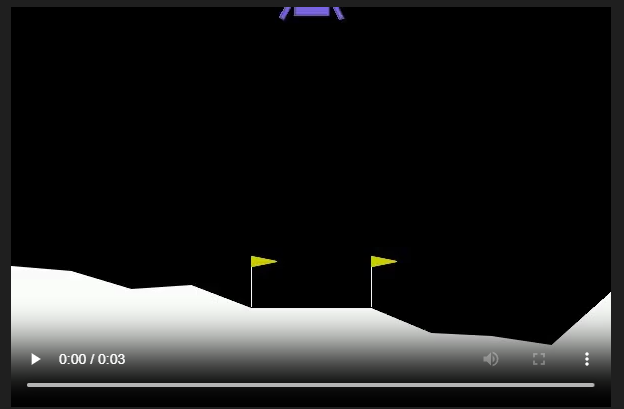

### Question 5

In [3]:
n_episodes = 5
total_score = 0
for episode in range(n_episodes):
    obs, info = env.reset()
    episode_score = 0
    
    done = False
    while not done:
        action = env.action_space.sample()
        obs, reward, terminated, truncated, info = env.step(action)

        done = terminated or truncated
        episode_score+=reward
    
    total_score+=episode_score
    print(f"Episode {episode + 1} - Total Reward: {episode_score}")

avg_score = total_score/n_episodes
print(f'Average score after running 5 episodes with random Agent: {avg_score}')

Episode 1 - Total Reward: -85.19881748315674
Episode 2 - Total Reward: -199.45610546040433
Episode 3 - Total Reward: -88.0933415717144
Episode 4 - Total Reward: -337.82504523576324
Episode 5 - Total Reward: -51.90456002651101
Average score after running 5 episodes with random Agent: -152.49557395550997


### Question 6

In [4]:
dqn_agent = DQN("MlpPolicy", env=env)

start = time.time()
dqn_agent.learn(total_timesteps=10000)
dqn_train_time = time.time()-start

In [5]:
ppo_agent = PPO('MlpPolicy', env=env)

start = time.time()
ppo_agent.learn(total_timesteps=10000)
ppo_train_time = time.time()-start

C:\Users\panos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\stable_baselines3\common\on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


### Question 7

##### Running episodes for DQN agent...

In [6]:
n_episodes = 5
dqn_episode_scores = []
for episode in range(n_episodes):
    obs, info = env.reset()
    episode_score = 0
    
    done = False
    while not done:
        action, _ = dqn_agent.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = env.step(action)

        done = terminated or truncated
        episode_score+=reward
    
    dqn_episode_scores.append(episode_score)
    print(f"Episode {episode + 1} - Total Reward: {episode_score}")

dqn_avg_score = sum(dqn_episode_scores)/n_episodes
print(f'Average score after running 5 episodes with DQN Agent: {dqn_avg_score}')

Episode 1 - Total Reward: -414.71107674248503
Episode 2 - Total Reward: -344.0408867290317
Episode 3 - Total Reward: -315.0662857145152
Episode 4 - Total Reward: -124.75670495041172
Episode 5 - Total Reward: -333.6697246642957
Average score after running 5 episodes with DQN Agent: -306.4489357601479


##### Running episodes for PPO agent...

In [7]:
n_episodes = 5
ppo_episode_scores = []
for episode in range(n_episodes):
    obs, info = env.reset()
    episode_score = 0
    
    done = False
    while not done:
        action, _ = ppo_agent.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = env.step(action)

        done = terminated or truncated
        episode_score+=reward
    
    ppo_episode_scores.append(episode_score)
    print(f"Episode {episode + 1} - Total Reward: {episode_score}")

ppo_avg_score = sum(ppo_episode_scores)/n_episodes
print(f'Average score after running 5 episodes with PPO Agent: {ppo_avg_score}')

Episode 1 - Total Reward: 8.93558855220158
Episode 2 - Total Reward: 18.9056089375961
Episode 3 - Total Reward: -26.933415771692395
Episode 4 - Total Reward: -7.179220596068447
Episode 5 - Total Reward: -105.67986497199546
Average score after running 5 episodes with PPO Agent: -22.390260769991723


#### Plot training time per agent

In [8]:
dqn_train_time, ppo_train_time

(28.40129280090332, 38.693523645401)

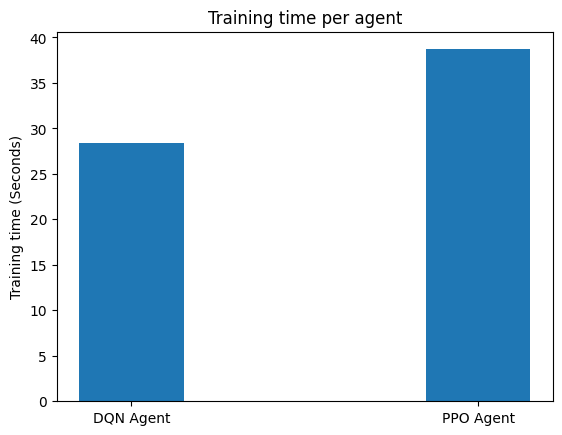

In [9]:
plt.bar(['DQN Agent', 'PPO Agent'], [dqn_train_time, ppo_train_time], width=0.3)
plt.ylabel('Training time (Seconds)')
plt.title('Training time per agent')

plt.show()

#### Plot score per episode

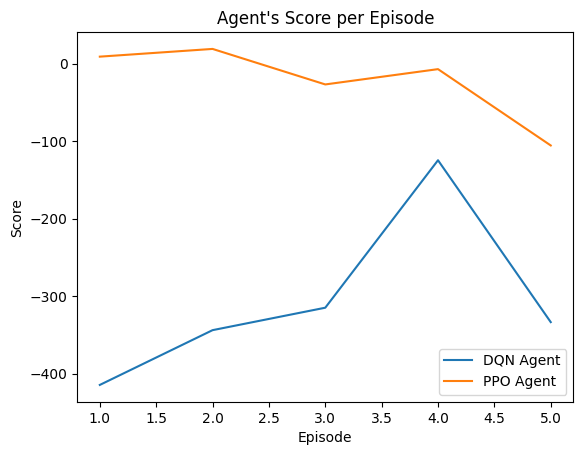

In [10]:
plt.plot([episode+1 for episode in range(n_episodes)], dqn_episode_scores, label='DQN Agent')
plt.plot([episode+1 for episode in range(n_episodes)], ppo_episode_scores, label='PPO Agent')
plt.xlabel('Episode')
plt.ylabel('Score')
plt.title("Agent's Score per Episode")
plt.legend()

plt.show()

### Question 8

In [18]:
def evaluate_agent(agent, env, n_episodes=5):
    episode_scores = []
    for episode in range(n_episodes):
        obs, info = env.reset()
        episode_score = 0
        
        done = False
        while not done:
            action, _ = agent.predict(obs, deterministic=True)
            obs, reward, terminated, truncated, info = env.step(action)

            done = terminated or truncated
            episode_score+=reward
        
        episode_scores.append(episode_score)

    avg_score = sum(episode_scores)/n_episodes
    print(f'Average score after running 5 episodes with Agent: {avg_score}')

    return avg_score

#### Fine-tuning DQN Agent

In [19]:
def objective(trial):
    learning_rate = trial.suggest_float("learning_rate", 0, 1)
    gamma = trial.suggest_loguniform("gamma", 1e-4, 1e1)
    learning_starts = trial.suggest_int("learning_starts", 10, 1000)

    dqn_agent = DQN("MlpPolicy", env=env, learning_rate=learning_rate, gamma=gamma, learning_starts=learning_starts)
    dqn_agent.learn(total_timesteps=10000)
    
    avg_score = evaluate_agent(dqn_agent, env, n_episodes=5)
    return avg_score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print(f"Best parameters: {study.best_params}")
print(f"Best average score: {study.best_value}")

[I 2026-01-10 00:03:27,767] A new study created in memory with name: no-name-74b408d2-25db-4547-91df-8fed4c7f6e82
C:\Users\panos\AppData\Local\Temp\ipykernel_14756\3440709592.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e1)
[I 2026-01-10 00:04:01,950] Trial 0 finished with value: -282.94439317701347 and parameters: {'learning_rate': 0.104854019052257, 'gamma': 0.0010096057258861002, 'learning_starts': 600}. Best is trial 0 with value: -282.94439317701347.


Average score after running 5 episodes with Agent: -282.94439317701347


[I 2026-01-10 00:04:30,873] Trial 1 finished with value: -1002.06813277133 and parameters: {'learning_rate': 0.6782584184177484, 'gamma': 0.0030039232043986247, 'learning_starts': 347}. Best is trial 0 with value: -282.94439317701347.


Average score after running 5 episodes with Agent: -1002.06813277133


[I 2026-01-10 00:04:59,195] Trial 2 finished with value: -152.88987989312767 and parameters: {'learning_rate': 0.26132732599466857, 'gamma': 3.157274840621353, 'learning_starts': 141}. Best is trial 2 with value: -152.88987989312767.


Average score after running 5 episodes with Agent: -152.88987989312767


[I 2026-01-10 00:05:27,726] Trial 3 finished with value: -657.3331515317259 and parameters: {'learning_rate': 0.8261046691901777, 'gamma': 0.45194746640650685, 'learning_starts': 961}. Best is trial 2 with value: -152.88987989312767.


Average score after running 5 episodes with Agent: -657.3331515317259


[I 2026-01-10 00:05:57,238] Trial 4 finished with value: -657.8937100356821 and parameters: {'learning_rate': 0.6649497238890779, 'gamma': 1.6821500717016604, 'learning_starts': 33}. Best is trial 2 with value: -152.88987989312767.


Average score after running 5 episodes with Agent: -657.8937100356821


[I 2026-01-10 00:06:25,270] Trial 5 finished with value: -140.77953238811105 and parameters: {'learning_rate': 0.6633452843742438, 'gamma': 0.6625325244765466, 'learning_starts': 690}. Best is trial 5 with value: -140.77953238811105.


Average score after running 5 episodes with Agent: -140.77953238811105


[I 2026-01-10 00:06:53,034] Trial 6 finished with value: -139.7390789650379 and parameters: {'learning_rate': 0.2461416710955997, 'gamma': 0.00013155003927129978, 'learning_starts': 920}. Best is trial 6 with value: -139.7390789650379.


Average score after running 5 episodes with Agent: -139.7390789650379


[I 2026-01-10 00:07:22,112] Trial 7 finished with value: -179.02316313604106 and parameters: {'learning_rate': 0.3407766871352208, 'gamma': 0.0019927488150887113, 'learning_starts': 56}. Best is trial 6 with value: -139.7390789650379.


Average score after running 5 episodes with Agent: -179.02316313604106


[I 2026-01-10 00:07:49,793] Trial 8 finished with value: -448.8931998281204 and parameters: {'learning_rate': 0.6986369929692086, 'gamma': 0.00010119547907414614, 'learning_starts': 932}. Best is trial 6 with value: -139.7390789650379.


Average score after running 5 episodes with Agent: -448.8931998281204


[I 2026-01-10 00:08:18,833] Trial 9 finished with value: -136.45980201795368 and parameters: {'learning_rate': 0.4484808251921444, 'gamma': 0.04222846308609786, 'learning_starts': 244}. Best is trial 9 with value: -136.45980201795368.


Average score after running 5 episodes with Agent: -136.45980201795368


[I 2026-01-10 00:08:49,585] Trial 10 finished with value: -1397.2716491552626 and parameters: {'learning_rate': 0.46171533267773285, 'gamma': 0.03805093723510912, 'learning_starts': 319}. Best is trial 9 with value: -136.45980201795368.


Average score after running 5 episodes with Agent: -1397.2716491552626


[I 2026-01-10 00:09:23,497] Trial 11 finished with value: -54.561117196626945 and parameters: {'learning_rate': 0.0025901801038364647, 'gamma': 0.044489853277185805, 'learning_starts': 730}. Best is trial 11 with value: -54.561117196626945.


Average score after running 5 episodes with Agent: -54.561117196626945


[I 2026-01-10 00:09:54,002] Trial 12 finished with value: -241.05098311850892 and parameters: {'learning_rate': 0.003831366420982474, 'gamma': 0.03323090156716126, 'learning_starts': 745}. Best is trial 11 with value: -54.561117196626945.


Average score after running 5 episodes with Agent: -241.05098311850892


[I 2026-01-10 00:10:23,023] Trial 13 finished with value: -134.87515108192306 and parameters: {'learning_rate': 0.9979216095461149, 'gamma': 0.13569506129844158, 'learning_starts': 420}. Best is trial 11 with value: -54.561117196626945.


Average score after running 5 episodes with Agent: -134.87515108192306


[I 2026-01-10 00:10:52,638] Trial 14 finished with value: -586.6463694682747 and parameters: {'learning_rate': 0.9540924742824108, 'gamma': 0.16235591996183266, 'learning_starts': 476}. Best is trial 11 with value: -54.561117196626945.


Average score after running 5 episodes with Agent: -586.6463694682747


[I 2026-01-10 00:11:21,116] Trial 15 finished with value: -583.4454512680172 and parameters: {'learning_rate': 0.9599874121619958, 'gamma': 0.009878226565362844, 'learning_starts': 506}. Best is trial 11 with value: -54.561117196626945.


Average score after running 5 episodes with Agent: -583.4454512680172


[I 2026-01-10 00:11:50,756] Trial 16 finished with value: -312.7964663038432 and parameters: {'learning_rate': 0.1206886014352605, 'gamma': 0.08724416501839947, 'learning_starts': 765}. Best is trial 11 with value: -54.561117196626945.


Average score after running 5 episodes with Agent: -312.7964663038432


[I 2026-01-10 00:12:21,674] Trial 17 finished with value: -127.72403271136554 and parameters: {'learning_rate': 0.8217604180524, 'gamma': 9.424414116753159, 'learning_starts': 501}. Best is trial 11 with value: -54.561117196626945.


Average score after running 5 episodes with Agent: -127.72403271136554


[I 2026-01-10 00:12:52,919] Trial 18 finished with value: -1480.1122257934812 and parameters: {'learning_rate': 0.5585587307434805, 'gamma': 9.799158063960496, 'learning_starts': 584}. Best is trial 11 with value: -54.561117196626945.


Average score after running 5 episodes with Agent: -1480.1122257934812


[I 2026-01-10 00:13:22,528] Trial 19 finished with value: -128.82131673209295 and parameters: {'learning_rate': 0.8133006054812943, 'gamma': 0.009811429086574798, 'learning_starts': 791}. Best is trial 11 with value: -54.561117196626945.


Average score after running 5 episodes with Agent: -128.82131673209295
Best parameters: {'learning_rate': 0.0025901801038364647, 'gamma': 0.044489853277185805, 'learning_starts': 730}
Best average score: -54.561117196626945


In [20]:
dqn_agent = DQN("MlpPolicy", env=env, learning_rate=study.best_params['learning_rate'], gamma=study.best_params['gamma'], learning_starts=study.best_params['learning_starts'])
dqn_agent.learn(total_timesteps=50000)

In [24]:
n_episodes = 5
dqn_episode_scores = []
for episode in range(n_episodes):
    obs, info = env.reset()
    episode_score = 0
    
    done = False
    while not done:
        action, _ = dqn_agent.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = env.step(action)

        done = terminated or truncated
        episode_score+=reward
    
    dqn_episode_scores.append(episode_score)
    print(f"Episode {episode + 1} - Total Reward: {episode_score}")

dqn_avg_score = sum(dqn_episode_scores)/n_episodes
print(f'Average score after running 5 episodes with DQN Agent: {dqn_avg_score}')

Episode 1 - Total Reward: -146.4321444126381
Episode 2 - Total Reward: 141.93639208862254
Episode 3 - Total Reward: -176.01679296131985
Episode 4 - Total Reward: -25.3773492235848
Episode 5 - Total Reward: 231.45385443106622
Average score after running 5 episodes with DQN Agent: 5.1127919844291965


#### Fine-tuning PPO Agent

In [26]:
def objective2(trial):
    learning_rate = trial.suggest_float("learning_rate", 0, 1)
    gamma = trial.suggest_loguniform("gamma", 1e-4, 1e1)
    n_steps = trial.suggest_int("n_steps", 2, 20)

    ppo_agent = PPO("MlpPolicy", env=env, learning_rate=learning_rate, gamma=gamma, n_steps=n_steps, batch_size=n_steps) #batch_size prepei na isoutai me n_steps*n_envs -> n_steps*1=n_steps
    ppo_agent.learn(total_timesteps=10000)
    
    avg_score = evaluate_agent(ppo_agent, env, n_episodes=5)
    return avg_score

study = optuna.create_study(direction='maximize')
study.optimize(objective2, n_trials=20)

print(f"Best parameters: {study.best_params}")
print(f"Best average score: {study.best_value}")

[I 2026-01-10 00:23:34,316] A new study created in memory with name: no-name-b03c935f-7e62-4231-876a-ccb7ac4d425e
C:\Users\panos\AppData\Local\Temp\ipykernel_14756\3458494277.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform("gamma", 1e-4, 1e1)
C:\Users\panos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\stable_baselines3\common\on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model wi

Average score after running 5 episodes with Agent: -663.4377149688491


[I 2026-01-10 00:25:45,400] Trial 1 finished with value: -860.6307949429471 and parameters: {'learning_rate': 0.060813982294652624, 'gamma': 0.00043846241424217076, 'n_steps': 13}. Best is trial 0 with value: -663.4377149688491.


Average score after running 5 episodes with Agent: -860.6307949429471


[I 2026-01-10 00:26:43,632] Trial 2 finished with value: -705.3055410327619 and parameters: {'learning_rate': 0.3052312453047089, 'gamma': 0.8554652244744881, 'n_steps': 19}. Best is trial 0 with value: -663.4377149688491.


Average score after running 5 episodes with Agent: -705.3055410327619


[I 2026-01-10 00:27:46,718] Trial 3 finished with value: -703.0188581160335 and parameters: {'learning_rate': 0.9590781875598012, 'gamma': 0.0001511804078312123, 'n_steps': 14}. Best is trial 0 with value: -663.4377149688491.


Average score after running 5 episodes with Agent: -703.0188581160335


[I 2026-01-10 00:30:34,406] Trial 4 finished with value: -528.869736789578 and parameters: {'learning_rate': 0.901804037376623, 'gamma': 1.74868577560249, 'n_steps': 3}. Best is trial 4 with value: -528.869736789578.


Average score after running 5 episodes with Agent: -528.869736789578


[I 2026-01-10 00:31:49,748] Trial 5 finished with value: -597.3118983761858 and parameters: {'learning_rate': 0.9863181130953534, 'gamma': 0.00044953912634196824, 'n_steps': 11}. Best is trial 4 with value: -528.869736789578.


Average score after running 5 episodes with Agent: -597.3118983761858


[I 2026-01-10 00:32:54,719] Trial 6 finished with value: -544.0535553713072 and parameters: {'learning_rate': 0.30549725901843083, 'gamma': 0.00011028252178047306, 'n_steps': 14}. Best is trial 4 with value: -528.869736789578.


Average score after running 5 episodes with Agent: -544.0535553713072


[I 2026-01-10 00:33:58,591] Trial 7 finished with value: -695.6331025330244 and parameters: {'learning_rate': 0.9928450246037782, 'gamma': 0.002007211539127797, 'n_steps': 19}. Best is trial 4 with value: -528.869736789578.


Average score after running 5 episodes with Agent: -695.6331025330244


[I 2026-01-10 00:34:56,694] Trial 8 finished with value: -120.96284350672943 and parameters: {'learning_rate': 0.6943390015688057, 'gamma': 0.8087253820420277, 'n_steps': 17}. Best is trial 8 with value: -120.96284350672943.


Average score after running 5 episodes with Agent: -120.96284350672943


[I 2026-01-10 00:35:54,812] Trial 9 finished with value: -460.35962777274074 and parameters: {'learning_rate': 0.5769135834371407, 'gamma': 0.07230241085302745, 'n_steps': 17}. Best is trial 8 with value: -120.96284350672943.


Average score after running 5 episodes with Agent: -460.35962777274074


[I 2026-01-10 00:37:21,392] Trial 10 finished with value: -638.3774715526453 and parameters: {'learning_rate': 0.6472501277374396, 'gamma': 0.08999099855147252, 'n_steps': 8}. Best is trial 8 with value: -120.96284350672943.


Average score after running 5 episodes with Agent: -638.3774715526453


[I 2026-01-10 00:38:23,851] Trial 11 finished with value: -1700.9442772990392 and parameters: {'learning_rate': 0.6546902015864959, 'gamma': 0.07543373352421365, 'n_steps': 17}. Best is trial 8 with value: -120.96284350672943.


Average score after running 5 episodes with Agent: -1700.9442772990392


[I 2026-01-10 00:39:33,369] Trial 12 finished with value: -579.9482439386428 and parameters: {'learning_rate': 0.6177792931063211, 'gamma': 0.011096717192455169, 'n_steps': 17}. Best is trial 8 with value: -120.96284350672943.


Average score after running 5 episodes with Agent: -579.9482439386428


[I 2026-01-10 00:41:04,484] Trial 13 finished with value: -650.3809740902576 and parameters: {'learning_rate': 0.4718073124964889, 'gamma': 0.4971817213934205, 'n_steps': 9}. Best is trial 8 with value: -120.96284350672943.


Average score after running 5 episodes with Agent: -650.3809740902576


C:\Users\panos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\panos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\stable_baselines3\common\utils.py:67: RuntimeWarning: invalid value encountered in scalar divide
  return np.nan if var_y == 0 else float(1 - np.var(y_true - y_pred) / var_y)
C:\Users\panos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
[I 2026-01-10 00:42:04,979] Trial 14 finished with value: -620.782589044265 and parameters: {'learning_rate': 0.740453316001019, 'gamma': 9.422135164491147,

Average score after running 5 episodes with Agent: -620.782589044265


[I 2026-01-10 00:43:08,067] Trial 15 finished with value: -528.5627723383238 and parameters: {'learning_rate': 0.47163825254446345, 'gamma': 0.013442458540331843, 'n_steps': 16}. Best is trial 8 with value: -120.96284350672943.


Average score after running 5 episodes with Agent: -528.5627723383238


[I 2026-01-10 00:44:54,011] Trial 16 finished with value: -1027.485101451432 and parameters: {'learning_rate': 0.7657394543986893, 'gamma': 0.23146491783381226, 'n_steps': 6}. Best is trial 8 with value: -120.96284350672943.


Average score after running 5 episodes with Agent: -1027.485101451432


[I 2026-01-10 00:45:53,133] Trial 17 finished with value: -623.9025677384883 and parameters: {'learning_rate': 0.36156588946673307, 'gamma': 0.0198286275323871, 'n_steps': 16}. Best is trial 8 with value: -120.96284350672943.


Average score after running 5 episodes with Agent: -623.9025677384883


[I 2026-01-10 00:47:06,006] Trial 18 finished with value: -448.10800972515847 and parameters: {'learning_rate': 0.15662311722609418, 'gamma': 0.15945585883509716, 'n_steps': 11}. Best is trial 8 with value: -120.96284350672943.


Average score after running 5 episodes with Agent: -448.10800972515847


[I 2026-01-10 00:48:20,879] Trial 19 finished with value: -547.9707622840588 and parameters: {'learning_rate': 0.016066836879323337, 'gamma': 7.845511164821495, 'n_steps': 11}. Best is trial 8 with value: -120.96284350672943.


Average score after running 5 episodes with Agent: -547.9707622840588
Best parameters: {'learning_rate': 0.6943390015688057, 'gamma': 0.8087253820420277, 'n_steps': 17}
Best average score: -120.96284350672943


In [27]:
ppo_agent = PPO("MlpPolicy", env=env, learning_rate=study.best_params['learning_rate'], gamma=study.best_params['gamma'], n_steps=study.best_params['n_steps'])
ppo_agent.learn(total_timesteps=50000)

C:\Users\panos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\stable_baselines3\ppo\ppo.py:155: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 17`, after every 0 untruncated mini-batches, there will be a truncated mini-batch of size 17
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=17 and n_envs=1)
  warnings.warn(


In [35]:
n_episodes = 5
ppo_episode_scores = []
for episode in range(n_episodes):
    obs, info = env.reset()
    episode_score = 0
    
    done = False
    while not done:
        action, _ = ppo_agent.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = env.step(action)

        done = terminated or truncated
        episode_score+=reward
    
    ppo_episode_scores.append(episode_score)
    print(f"Episode {episode + 1} - Total Reward: {episode_score}")

ppo_avg_score = sum(ppo_episode_scores)/n_episodes
print(f'Average score after running 5 episodes with PPO Agent: {ppo_avg_score}')

Episode 1 - Total Reward: -559.7091793873876
Episode 2 - Total Reward: -371.3656793520107
Episode 3 - Total Reward: -592.0264960636101
Episode 4 - Total Reward: -607.7544853230327
Episode 5 - Total Reward: -489.75986518854035
Average score after running 5 episodes with PPO Agent: -524.1231410629164


#### Plot score per episode for fine-tuned agents

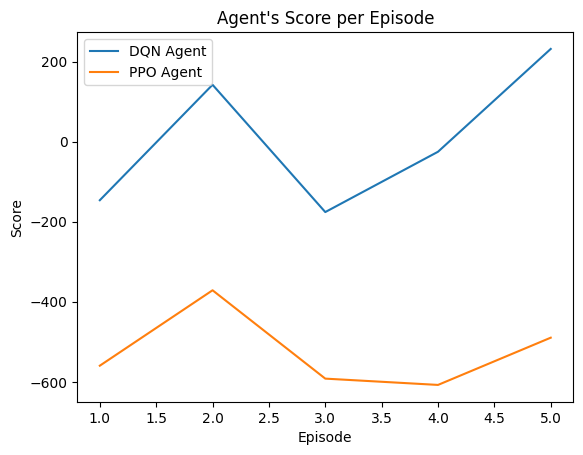

In [36]:
plt.plot([episode+1 for episode in range(n_episodes)], dqn_episode_scores, label='DQN Agent')
plt.plot([episode+1 for episode in range(n_episodes)], ppo_episode_scores, label='PPO Agent')
plt.xlabel('Episode')
plt.ylabel('Score')
plt.title("Agent's Score per Episode")
plt.legend()

plt.show()